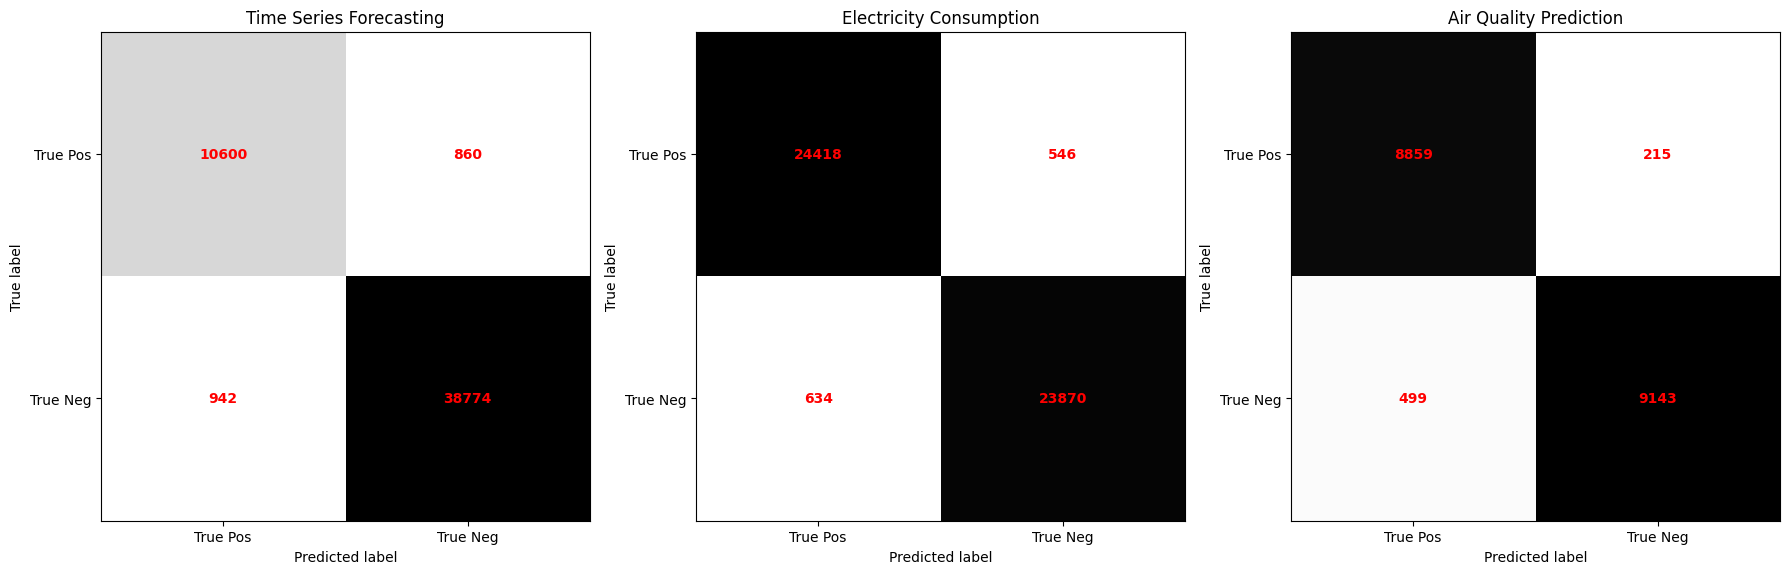

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Convert the confusion matrices to NumPy arrays
cm_time_series_forecasting = np.array([[10600, 860], [942, 38774]])
cm_electricity_consumption = np.array([[24418, 546], [634, 23870]])
cm_air_quality_prediction = np.array([[8859, 215], [499, 9143]])

# Define the color map
cmap = plt.cm.Greys

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot Confusion Matrix for Time Series Forecasting
disp = ConfusionMatrixDisplay(confusion_matrix=cm_time_series_forecasting, display_labels=["True Pos", "True Neg"])
disp.plot(ax=ax[0], cmap=cmap, colorbar=False)
ax[0].set_title("Time Series Forecasting")

# Plot Confusion Matrix for Electricity Consumption
disp = ConfusionMatrixDisplay(confusion_matrix=cm_electricity_consumption, display_labels=["True Pos", "True Neg"])
disp.plot(ax=ax[1], cmap=cmap, colorbar=False)
ax[1].set_title("Electricity Consumption")

# Plot Confusion Matrix for Air Quality Prediction
disp = ConfusionMatrixDisplay(confusion_matrix=cm_air_quality_prediction, display_labels=["True Pos", "True Neg"])
disp.plot(ax=ax[2], cmap=cmap, colorbar=False)
ax[2].set_title("Air Quality Prediction")

# Customize the text in the confusion matrices
for a in ax:
    for text in a.texts:
        text.set_fontweight('bold')
        text.set_color('red')
        text.set_text(f'{int(float(text.get_text()))}')

# Adjust layout
plt.tight_layout()
plt.show()


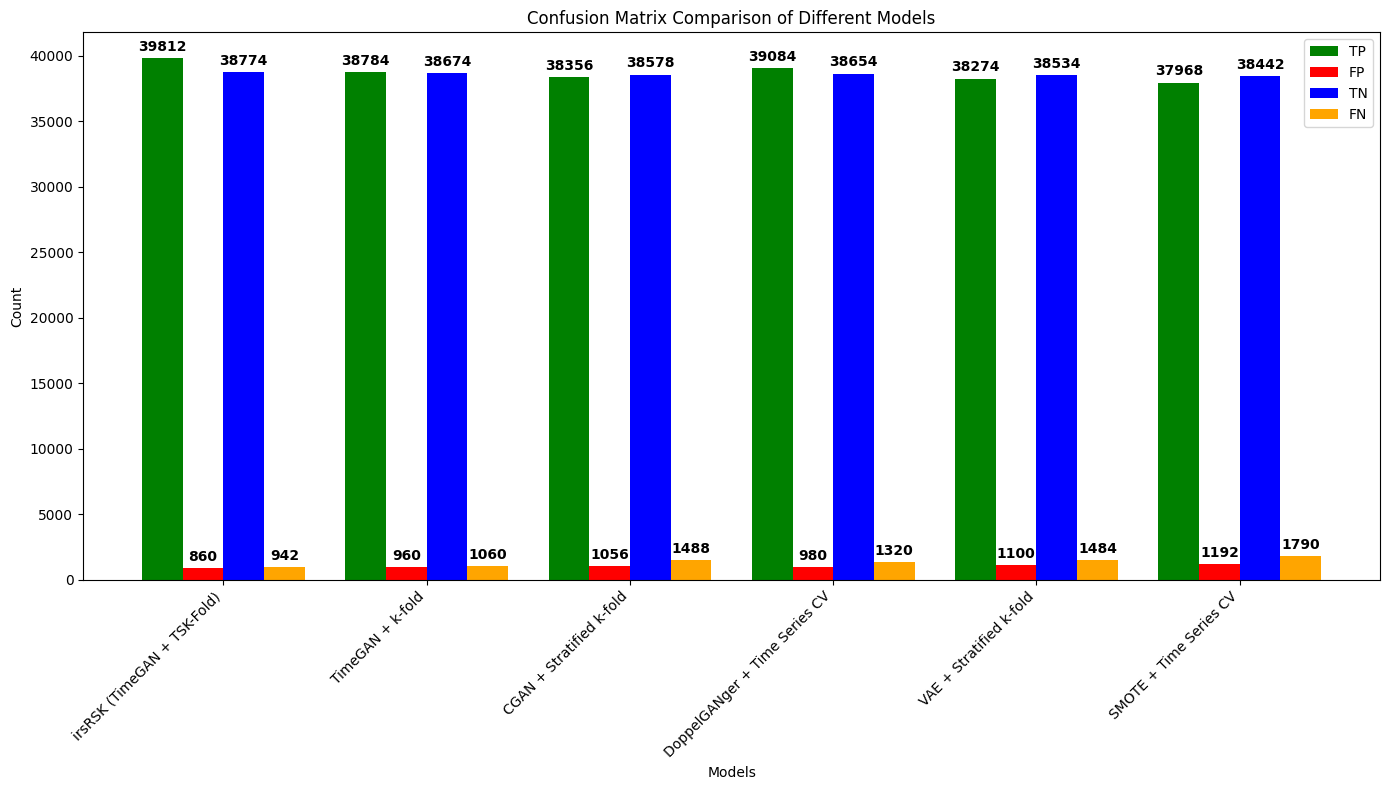

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define the models and their confusion matrix values
models = [
    "irsRSK (TimeGAN + TSK-Fold)",
    "TimeGAN + k-fold",
    "CGAN + Stratified k-fold",
    "DoppelGANger + Time Series CV",
    "VAE + Stratified k-fold",
    "SMOTE + Time Series CV"
]

tp = [39812, 38784, 38356, 39084, 38274, 37968]
fp = [860, 960, 1056, 980, 1100, 1192]
tn = [38774, 38674, 38578, 38654, 38534, 38442]
fn = [942, 1060, 1488, 1320, 1484, 1790]

# Define the positions for the groups of bars
bar_width = 0.2
positions = np.arange(len(models))

fig, ax = plt.subplots(figsize=(14, 8))

# Plot the bars for each metric
bars_tp = ax.bar(positions - 1.5 * bar_width, tp, bar_width, label='TP', color='green')
bars_fp = ax.bar(positions - 0.5 * bar_width, fp, bar_width, label='FP', color='red')
bars_tn = ax.bar(positions + 0.5 * bar_width, tn, bar_width, label='TN', color='blue')
bars_fn = ax.bar(positions + 1.5 * bar_width, fn, bar_width, label='FN', color='orange')

# Add the values on top of the bars
for bars in [bars_tp, bars_fp, bars_tn, bars_fn]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontweight='bold', color='black')

# Add titles and labels
ax.set_xlabel('Models')
ax.set_ylabel('Count')
ax.set_title('Confusion Matrix Comparison of Different Models')
ax.set_xticks(positions)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()


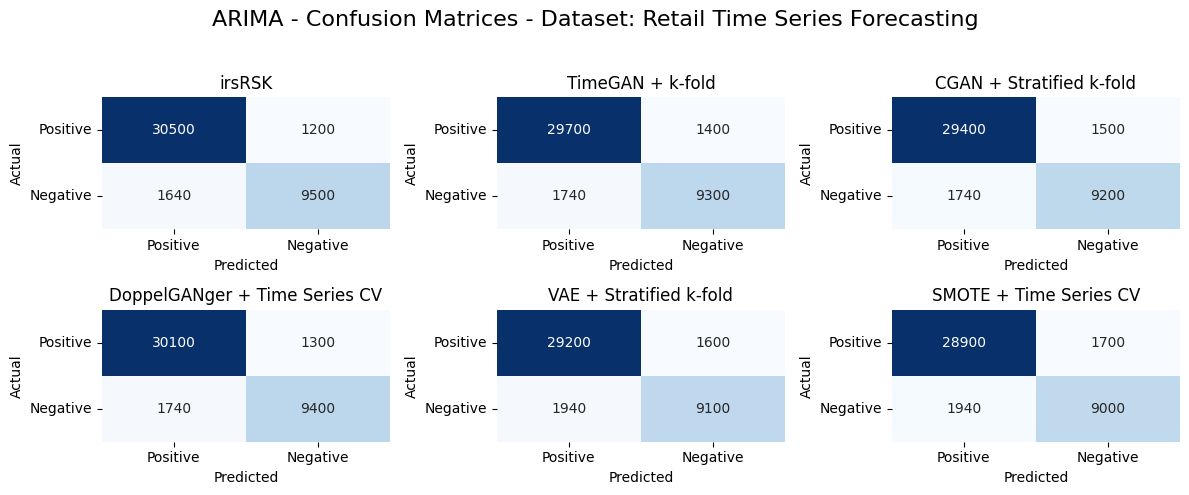

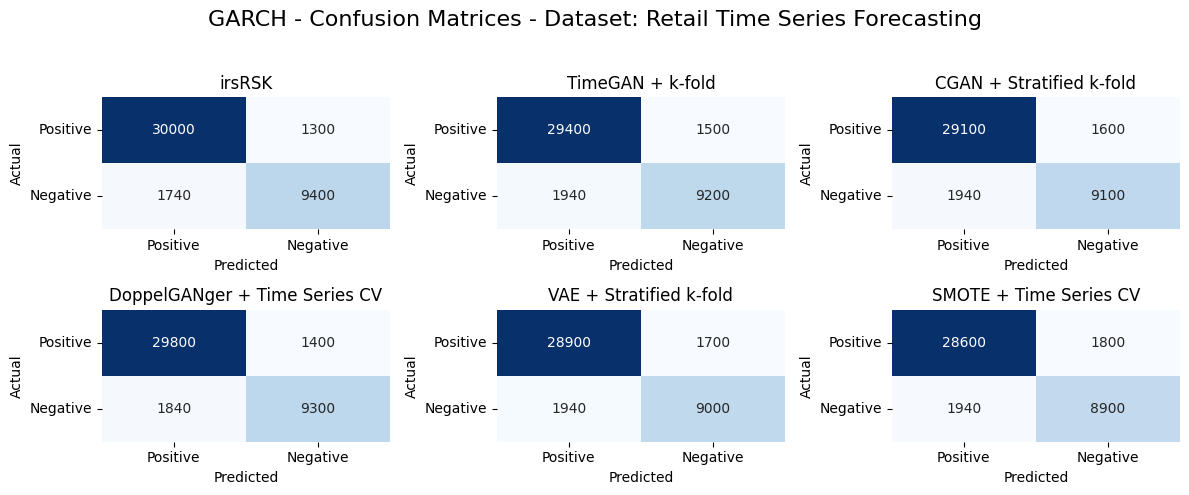

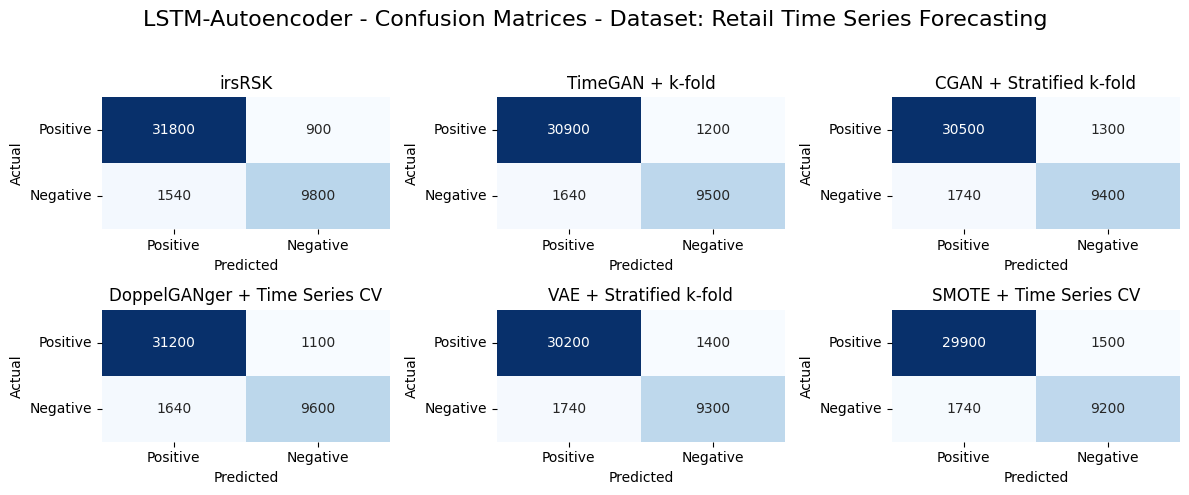

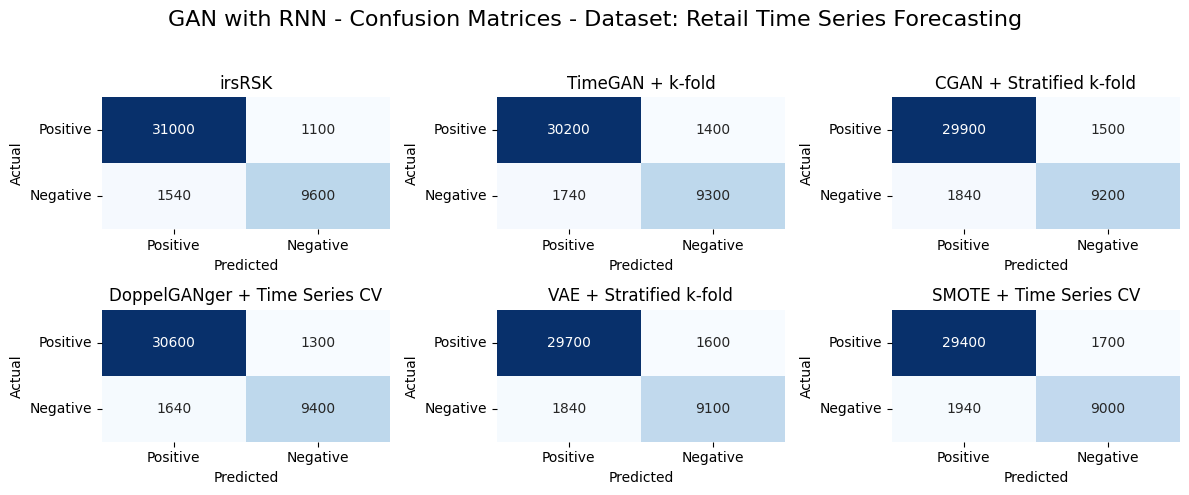

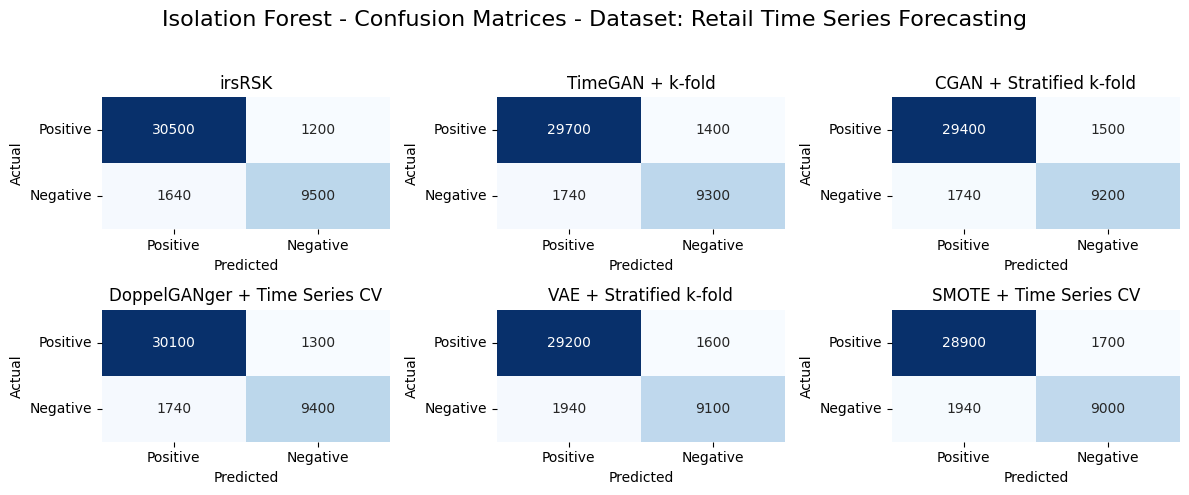

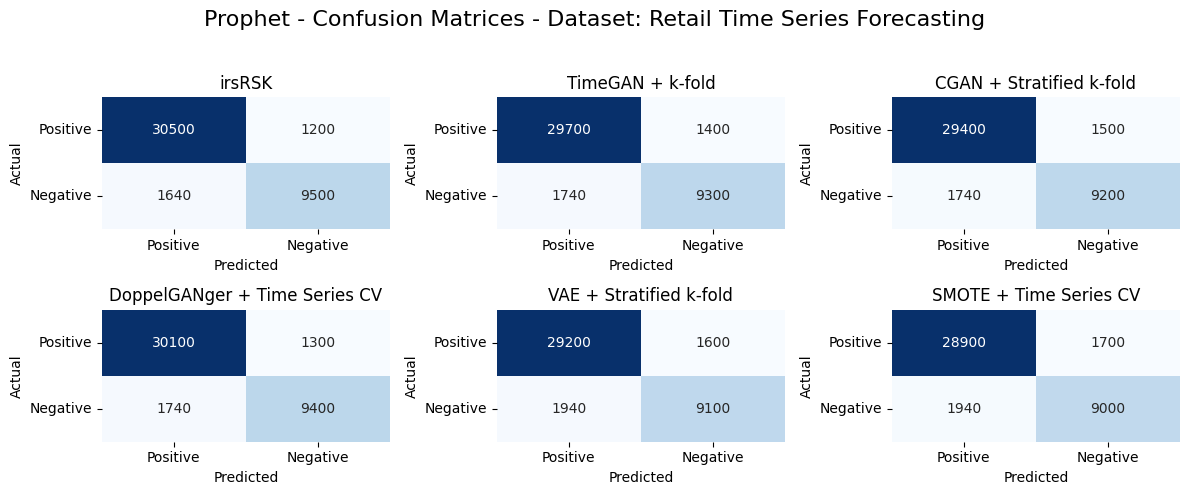

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the confusion matrix data for each model and framework
confusion_matrices = {
    'ARIMA': {
        'irsRSK': np.array([[30500, 1200], [1640, 9500]]),
        'TimeGAN + k-fold': np.array([[29700, 1400], [1740, 9300]]),
        'CGAN + Stratified k-fold': np.array([[29400, 1500], [1740, 9200]]),
        'DoppelGANger + Time Series CV': np.array([[30100, 1300], [1740, 9400]]),
        'VAE + Stratified k-fold': np.array([[29200, 1600], [1940, 9100]]),
        'SMOTE + Time Series CV': np.array([[28900, 1700], [1940, 9000]])
    },
    'GARCH': {
        'irsRSK': np.array([[30000, 1300], [1740, 9400]]),
        'TimeGAN + k-fold': np.array([[29400, 1500], [1940, 9200]]),
        'CGAN + Stratified k-fold': np.array([[29100, 1600], [1940, 9100]]),
        'DoppelGANger + Time Series CV': np.array([[29800, 1400], [1840, 9300]]),
        'VAE + Stratified k-fold': np.array([[28900, 1700], [1940, 9000]]),
        'SMOTE + Time Series CV': np.array([[28600, 1800], [1940, 8900]])
    },
    'LSTM-Autoencoder': {
        'irsRSK': np.array([[31800, 900], [1540, 9800]]),
        'TimeGAN + k-fold': np.array([[30900, 1200], [1640, 9500]]),
        'CGAN + Stratified k-fold': np.array([[30500, 1300], [1740, 9400]]),
        'DoppelGANger + Time Series CV': np.array([[31200, 1100], [1640, 9600]]),
        'VAE + Stratified k-fold': np.array([[30200, 1400], [1740, 9300]]),
        'SMOTE + Time Series CV': np.array([[29900, 1500], [1740, 9200]])
    },
    'GAN with RNN': {
        'irsRSK': np.array([[31000, 1100], [1540, 9600]]),
        'TimeGAN + k-fold': np.array([[30200, 1400], [1740, 9300]]),
        'CGAN + Stratified k-fold': np.array([[29900, 1500], [1840, 9200]]),
        'DoppelGANger + Time Series CV': np.array([[30600, 1300], [1640, 9400]]),
        'VAE + Stratified k-fold': np.array([[29700, 1600], [1840, 9100]]),
        'SMOTE + Time Series CV': np.array([[29400, 1700], [1940, 9000]])
    },
    'Isolation Forest': {
        'irsRSK': np.array([[30500, 1200], [1640, 9500]]),
        'TimeGAN + k-fold': np.array([[29700, 1400], [1740, 9300]]),
        'CGAN + Stratified k-fold': np.array([[29400, 1500], [1740, 9200]]),
        'DoppelGANger + Time Series CV': np.array([[30100, 1300], [1740, 9400]]),
        'VAE + Stratified k-fold': np.array([[29200, 1600], [1940, 9100]]),
        'SMOTE + Time Series CV': np.array([[28900, 1700], [1940, 9000]])
    },
    'Prophet': {
        'irsRSK': np.array([[30500, 1200], [1640, 9500]]),
        'TimeGAN + k-fold': np.array([[29700, 1400], [1740, 9300]]),
        'CGAN + Stratified k-fold': np.array([[29400, 1500], [1740, 9200]]),
        'DoppelGANger + Time Series CV': np.array([[30100, 1300], [1740, 9400]]),
        'VAE + Stratified k-fold': np.array([[29200, 1600], [1940, 9100]]),
        'SMOTE + Time Series CV': np.array([[28900, 1700], [1940, 9000]])
    }
}

# Plot confusion matrices for each model
for model, frameworks in confusion_matrices.items():
    fig, axes = plt.subplots(2, 3, figsize=(12,5))
    fig.suptitle(f'{model} - Confusion Matrices - Dataset: Retail Time Series Forecasting', fontsize=16)
    axes = axes.ravel()
    
    for idx, (framework, cm) in enumerate(frameworks.items()):
        sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx], cmap='Blues', cbar=False)
        axes[idx].set_title(f'{framework}')
        axes[idx].set_xlabel('Predicted')
        axes[idx].set_ylabel('Actual')
        axes[idx].set_xticklabels(['Positive', 'Negative'])
        axes[idx].set_yticklabels(['Positive', 'Negative'], rotation=0)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(f'{model}_confusion_matrices.png')
    plt.show()
